In [1]:
import requests
import csv #to store the data
import pandas as pd #For storing data
import matplotlib.pyplot as plt #For Visualisation
from bs4 import BeautifulSoup

In [2]:
response=requests.get('https://www.rottentomatoes.com/top/bestofrt/')
response.status_code # status code 200 defines Success - OK

200

In [3]:
soup=BeautifulSoup(response.content,'html.parser')
movie_list=soup.find('table','table')

In [4]:
movie_rating=movie_list.find_all('span','tMeterScore')
movie_name=movie_list.find_all('a',attrs={'class':'unstyled articleLink'})
movie_reviews=movie_list.find_all('td','right hidden-xs')

In [5]:
#Now we have collected required tags
movie_name[1],movie_rating[1],movie_reviews[1]

(<a class="unstyled articleLink" href="/m/parasite_2019">
             Parasite (Gisaengchung) (2019)</a>,
 <span class="tMeterScore"> 98%</span>,
 <td class="right hidden-xs">456</td>)

In [6]:
for i in range(100):
    movie_name[i]=movie_name[i].string
    movie_rating[i]=movie_rating[i].string
    movie_reviews[i]=movie_reviews[i].string

In [7]:
#Now we have extracted the data
movie_name[1],movie_rating[1],movie_reviews[1]

('\n            Parasite (Gisaengchung) (2019)', '\xa098%', '456')

In [8]:
'''
We need our data as:
Movie Name, Movie Year, Movie Ratings, Movie Reviews
So we have defined a function Movie_name_year which splits movie name and year.
'''
def Movie_name_year(movie):
    movie=movie[1:]
    movie=str.lstrip(movie) #Stripping any whitespaces from left
    return movie[:-6], movie[-5:-1]

In [9]:
movie_year=[]
for i in range(100):
    name, year=Movie_name_year(movie_name[i])
    movie_name[i]=name
    movie_year.append(year)

In [10]:
'''
We need to:
clean the ratings 
Convert year, reviews and ratings to integer
'''
y=[]
for i in range(100):
    movie_year[i]=int(movie_year[i])
    movie_reviews[i]=int(movie_reviews[i])
    movie_rating[i]=int(movie_rating[i][1:-1])

In [10]:
#Here we are going to store the data into a csv file
#Creating a DataFrame to store
movie=pd.DataFrame({'Name':movie_name,'Year':movie_year,'Ratings':movie_rating,'Reviews':movie_reviews})
movie.head()

,Name,Year,Ratings,Reviews
0,Black Panther,2018,96%,517
1,Parasite (Gisaengchung),2019,98%,456
2,Avengers: Endgame,2019,94%,532
3,Knives Out,2019,97%,458
4,Us,2019,93%,539


In [11]:
movie.to_csv('TopMovies(RottenTomatoes).csv')

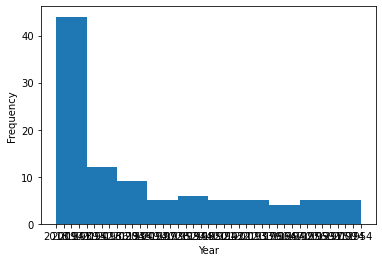

In [15]:
plt.hist(movie.Year,bins=10)
plt.xlabel('Year')
plt.ylabel('Frequency',rotation=90)
plt.show()